In [1]:
#THE PURPOSE OF THIS NOTEBOOK IS TO ILLUSTRATE OUR PRELIMINARY THOUGHT PROCESS AND THE CHALLENGES THAT CONTRIBUTED TO THE DECISION TO PIVOT TO A BINARY CLASSIFICATION APPROACH.
#IT INCLUDES OUR BASELINE MODELING ON THE ORIGINAL 4-CLASS PROBLEM.
#FOR OUR FINAL METHODOLOGY, PLEASE REFER TO THE MAIN NOTEBOOK: 'Psy_genome Binary Classification.ipynb'

In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import sklearn
import IPython
import seaborn as sns
import pandas as pd
#pd.set_option('display.max_rows', None)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from collections import Counter
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.feature_selection import RFE
from sklearn.base import clone
sns.set_theme()

In [3]:
df = pd.read_csv("PsyGenome_MHD.csv", sep=",")

## Data Exploration and Preprocessing

In [4]:
df.head()
#df.shape
#df.columns

,Patient_ID,Age,Gender,Family_History,Diagnosis,SNP_1,SNP_2,SNP_3,SNP_4,SNP_5,...,Methyl_1,Methyl_2,Methyl_3,Methyl_4,Methyl_5,Methyl_6,Methyl_7,Methyl_8,Methyl_9,Methyl_10
0,P0001,56,Female,No,Bipolar Disorder,0,0,0,2,2,...,0.022812,0.863495,0.333444,0.156849,0.172709,0.885895,0.654431,0.956346,0.800040,0.767543
1,P0002,69,Male,No,Alzheimer's,0,2,2,0,0,...,0.499821,0.820805,0.412653,0.827000,0.757741,0.678439,0.329716,0.630712,0.506788,0.461543
2,P0003,46,Female,No,Healthy,1,2,1,2,1,...,0.990246,0.504398,0.031986,0.626468,0.728011,0.885184,0.632685,0.019457,0.119744,0.161240
3,P0004,32,Male,No,Healthy,2,1,0,1,2,...,0.211261,0.799777,0.309760,0.312362,0.755587,0.412437,0.064640,0.585126,0.130068,0.571664
4,P0005,60,Male,No,Bipolar Disorder,1,2,0,1,0,...,0.779638,0.929490,0.067053,0.303967,0.652464,0.315453,0.451026,0.020091,0.693498,0.883280


In [5]:
df.describe()

,Age,SNP_1,SNP_2,SNP_3,SNP_4,SNP_5,SNP_6,SNP_7,SNP_8,SNP_9,...,Methyl_1,Methyl_2,Methyl_3,Methyl_4,Methyl_5,Methyl_6,Methyl_7,Methyl_8,Methyl_9,Methyl_10
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,49.910000,1.052000,0.982000,0.978000,1.018000,1.010000,1.056000,0.936000,0.99600,0.954000,...,0.484021,0.515909,0.484022,0.486544,0.518373,0.514531,0.505161,0.486372,0.474954,0.491152
std,18.221909,0.823804,0.799346,0.801749,0.831299,0.814387,0.786193,0.805731,0.80329,0.820506,...,0.299147,0.293635,0.283283,0.288411,0.282911,0.281080,0.289018,0.300487,0.295196,0.284357
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000165,0.004312,0.000924,0.001606,0.006378,0.009338,0.001108,0.000482,0.000248,0.000102
25%,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.211249,0.252536,0.248019,0.238156,0.277091,0.274308,0.262903,0.217933,0.205184,0.267800
50%,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,0.465241,0.516162,0.492216,0.482114,0.535592,0.528392,0.496943,0.500126,0.474101,0.493299
75%,66.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,...,0.759286,0.768997,0.715999,0.739060,0.756340,0.749853,0.763210,0.752980,0.729198,0.738306
max,79.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,...,0.998590,0.999808,0.998346,0.999177,0.998940,0.999127,0.999812,0.998719,0.998385,0.999609


In [6]:
df['Diagnosis'].value_counts()

Diagnosis
Bipolar Disorder    136
Alzheimer's         128
Schizophrenia       127
Healthy             109
Name: count, dtype: int64

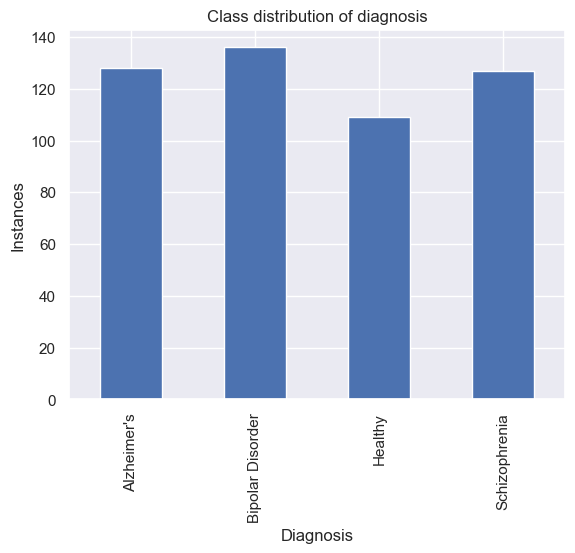

In [7]:
df["Diagnosis"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Diagnosis")
plt.ylabel("Instances")
plt.title("Class distribution of diagnosis")
plt.show()

In [8]:
#Drop the ID column and encode gender, family history and diagnosis columns
df = df.drop('Patient_ID', axis=1)

#encoding family history
df['Family_History'] = df['Family_History'].map({
    'Yes': 1,
    'No': 0
})

df['Gender'] = df['Gender'].map({
    'Male': 1,
    'Female': 0
})

df['Diagnosis'] = df['Diagnosis'].map({
    'Healthy': 0,
    'Bipolar Disorder': 1,
    'Alzheimer\'s': 2,
    'Schizophrenia': 3,
})
df.head()

,Age,Gender,Family_History,Diagnosis,SNP_1,SNP_2,SNP_3,SNP_4,SNP_5,SNP_6,...,Methyl_1,Methyl_2,Methyl_3,Methyl_4,Methyl_5,Methyl_6,Methyl_7,Methyl_8,Methyl_9,Methyl_10
0,56,0,0,1,0,0,0,2,2,0,...,0.022812,0.863495,0.333444,0.156849,0.172709,0.885895,0.654431,0.956346,0.800040,0.767543
1,69,1,0,2,0,2,2,0,0,2,...,0.499821,0.820805,0.412653,0.827000,0.757741,0.678439,0.329716,0.630712,0.506788,0.461543
2,46,0,0,0,1,2,1,2,1,2,...,0.990246,0.504398,0.031986,0.626468,0.728011,0.885184,0.632685,0.019457,0.119744,0.161240
3,32,1,0,0,2,1,0,1,2,2,...,0.211261,0.799777,0.309760,0.312362,0.755587,0.412437,0.064640,0.585126,0.130068,0.571664
4,60,1,0,1,1,2,0,1,0,1,...,0.779638,0.929490,0.067053,0.303967,0.652464,0.315453,0.451026,0.020091,0.693498,0.883280


## X, Y, Train, Test Split

In [9]:
#split into x and y
X = df.drop('Diagnosis', axis=1)
Y = df['Diagnosis']

In [10]:
#Since we will not be scaling all the features, just the continuous variables and the age column, we lump these columns in one variable

gene_expr_cols = [col for col in X.columns if col.startswith('GeneExpr_')]
methyl_cols = [col for col in X.columns if col.startswith('Methyl_')]

continuous_cols = ['Age'] + gene_expr_cols + methyl_cols


In [11]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7, stratify=Y)
print(X_train.shape)
print(X_test.shape)

(400, 83)
(100, 83)


In [12]:
#Scaler Fit and transform 
scaler = StandardScaler()
scaler.fit(X_train[continuous_cols])

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[continuous_cols] = scaler.transform(X_train[continuous_cols])
X_test_scaled[continuous_cols] = scaler.transform(X_test[continuous_cols])

X_train_scaled.head()

,Age,Gender,Family_History,SNP_1,SNP_2,SNP_3,SNP_4,SNP_5,SNP_6,SNP_7,...,Methyl_1,Methyl_2,Methyl_3,Methyl_4,Methyl_5,Methyl_6,Methyl_7,Methyl_8,Methyl_9,Methyl_10
246,-1.683360,0,1,1,0,0,1,2,0,2,...,1.290005,-1.105350,1.332781,-0.155586,1.116856,-0.882727,-1.290935,0.231773,0.100016,-0.522461
343,-0.856900,1,0,0,2,0,2,0,1,1,...,1.025112,1.424964,1.829816,0.171320,0.146012,-1.742202,1.242334,-1.535402,0.509090,-1.455532
231,1.346991,0,0,1,2,1,2,2,0,0,...,-1.032750,-1.460382,0.145929,-0.618017,1.376493,-1.157124,0.335098,1.392528,-1.434488,0.054927
300,-1.518068,0,1,0,1,1,1,2,0,1,...,0.093764,0.868250,0.941329,0.229837,-1.382787,-1.045109,-0.919439,-1.502017,-0.332267,0.395698
473,0.851115,1,1,2,2,1,1,0,1,0,...,1.172958,-1.045426,0.799095,-0.277405,-1.574059,0.850077,0.886149,-0.722075,1.449818,0.950615


## Baseline Model Training and Testing 

In [13]:
#Model initialization
RF_model = RandomForestClassifier(
    n_estimators=300,
    max_depth= 10,
    min_samples_leaf= 5,
    class_weight='balanced',
    random_state=7
)
SVM_model = SVC(
    kernel = 'rbf',
    C=1.0,
    class_weight="balanced",
    max_iter=5000
)

In [14]:
#Train both RF and SVM on the scaled training dataset ... try doing RF on the unscaled datase and see whats it does
RF_model.fit(X_train_scaled, y_train)
SVM_model.fit(X_train_scaled, y_train)

SVC(class_weight='balanced', max_iter=5000)

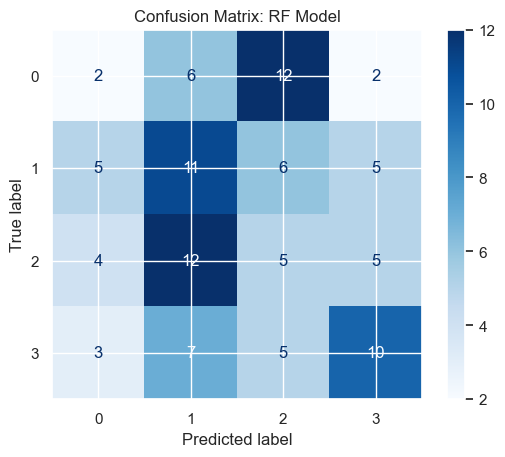

RF Accuracy Score: 28.00%
RF F1 Score: 26.78


In [15]:
#RF performance on the Test dataset
y_pred = RF_model.predict(X_test_scaled)
test_acc = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred, average="macro")

ConfusionMatrixDisplay.from_estimator(RF_model, X_test_scaled, y_test, cmap='Blues')
plt.title("Confusion Matrix: RF Model")
plt.show()

print(f"RF Accuracy Score: {test_acc*100:.2f}%")
print(f"RF F1 Score: {test_f1*100:.2f}")

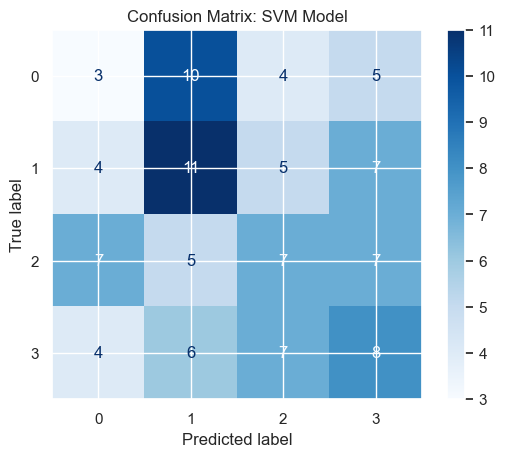

SVM Accuracy Score: 29.00%
SVM F1 Score: 27.91


In [16]:
#SVM performance on the Test dataset
y_pred = SVM_model.predict(X_test_scaled)
test_acc = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred, average="macro")

ConfusionMatrixDisplay.from_estimator(SVM_model, X_test_scaled, y_test, cmap='Blues')
plt.title("Confusion Matrix: SVM Model")
plt.show()

print(f"SVM Accuracy Score: {test_acc*100:.2f}%")
print(f"SVM F1 Score: {test_f1*100:.2f}")

## Feature Selection with Recursive feature elimination (RFE)

In [17]:
X_train_scaled.var(axis=0)
#This give us a vague idea about features most useful for the model’s predictive performance, given the algorithm and evaluation metric used.

Age               1.002506
Gender            0.250627
Family_History    0.250000
SNP_1             0.693979
SNP_2             0.628315
                    ...   
Methyl_6          1.002506
Methyl_7          1.002506
Methyl_8          1.002506
Methyl_9          1.002506
Methyl_10         1.002506
Length: 83, dtype: float64

In [18]:
X_train_v3, X_test_v3, y_train_v3, y_test_v3 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

#RFE WITH RANDOM FOREST
n_features_list = list(range(10, 81, 10)) + [83]
rfe_f1_score_list = []

for k in n_features_list:
    RFE_selector_RF = RFE(estimator=RF_model, n_features_to_select=k, step=1)
    RFE_selector_RF.fit(X_train_v3, y_train_v3)
    
    sel_X_train_v3 = RFE_selector_RF.transform(X_train_v3)
    sel_X_test_v3 = RFE_selector_RF.transform(X_test_v3)

    RF_cloned = clone(RF_model)
    RF_cloned.fit(sel_X_train_v3, y_train_v3)
    RFE_preds = RF_cloned.predict(sel_X_test_v3)
    
    f1_score_rfe = round(f1_score(y_test_v3, RFE_preds, average='macro'), 3)
    
    rfe_f1_score_list.append(f1_score_rfe)

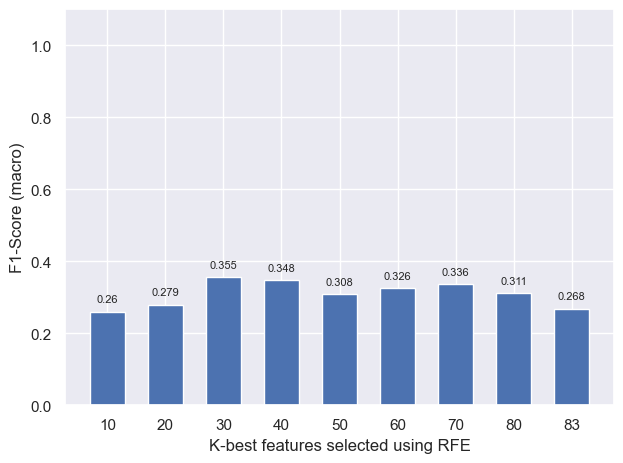

In [19]:
fig, ax = plt.subplots()

x = np.arange(len(n_features_list))
y = rfe_f1_score_list

ax.bar(x, y, width=0.6)
ax.set_xlabel('K-best features selected using RFE')
ax.set_ylabel('F1-Score (macro)')
ax.set_ylim(0, 1.1)
ax.set_xticks(x)
ax.set_xticklabels(n_features_list)

for i, v in enumerate(y):
    ax.text(i, v + 0.02, str(v), ha='center', va='bottom', fontsize=8)
    
plt.tight_layout()
plt.show()


In [20]:
#Because RBF kernel has no linear coefficients per feature, we'll select features with the linear kernel, and use the selected features on RBF Kernel
linear_svm = LinearSVC(
    C=1.0,
    class_weight='balanced',
    max_iter=5000
)

X_train_v4, X_test_v4, y_train_v4, y_test_v4 = X_train_scaled.copy(), X_test_scaled.copy(), y_train.copy(), y_test.copy()

#RFE WITH SUPPORT VECTOR
n_features_list = list(range(10, 81, 10)) + [83]
rfe_f1_score_list_SVM = []

for k in n_features_list:
    RFE_selector_SVM = RFE(estimator=linear_svm, n_features_to_select=k, step=1)
    RFE_selector_SVM.fit(X_train_v4, y_train_v4) 
    
    sel_X_train_v4 = RFE_selector_SVM.transform(X_train_v4)
    sel_X_test_v4 = RFE_selector_SVM.transform(X_test_v4)

    SVM_cloned = clone(SVM_model)
    SVM_cloned.fit(sel_X_train_v4, y_train_v4)
    SVM_RFE_preds = SVM_cloned.predict(sel_X_test_v4)
    
    f1_score_rfe_SVM = round(f1_score(y_test_v4, SVM_RFE_preds, average='macro'), 3)
    
    rfe_f1_score_list_SVM.append(f1_score_rfe_SVM)

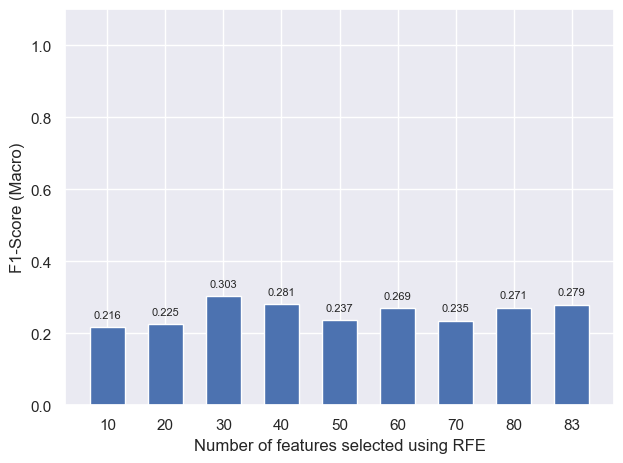

In [21]:
fig, ax = plt.subplots()

x = np.arange(len(n_features_list))
y = rfe_f1_score_list_SVM

ax.bar(x, y, width=0.6)
ax.set_xlabel('Number of features selected using RFE')
ax.set_ylabel('F1-Score (Macro)')
ax.set_ylim(0, 1.1)
ax.set_xticks(x)
ax.set_xticklabels(n_features_list)

for i, v in enumerate(y):
    ax.text(i, v + 0.02, str(v), ha='center', va='bottom', fontsize=8)
    
plt.tight_layout()
plt.show()


#### So we can see that from both models, training and testing with the top 30 features gives the most optimal results

### THE MOST IMPACTFUL FEATURES FOR EACH MODEL

In [22]:
# Random Forest
RF_selector = RFE(estimator=RF_model, n_features_to_select=30, step=1)
RF_selector.fit(X_train_v3, y_train_v3)

selected_features_mask = RF_selector.get_support()

RF_selected_features = X_train_v3.columns[selected_features_mask]
RF_selected_features

Index(['Age', 'GeneExpr_1', 'GeneExpr_2', 'GeneExpr_3', 'GeneExpr_4',
       'GeneExpr_5', 'GeneExpr_6', 'GeneExpr_7', 'GeneExpr_8', 'GeneExpr_9',
       'GeneExpr_10', 'GeneExpr_11', 'GeneExpr_12', 'GeneExpr_13',
       'GeneExpr_14', 'GeneExpr_15', 'GeneExpr_16', 'GeneExpr_17',
       'GeneExpr_18', 'GeneExpr_19', 'GeneExpr_20', 'Methyl_1', 'Methyl_2',
       'Methyl_3', 'Methyl_4', 'Methyl_5', 'Methyl_6', 'Methyl_7', 'Methyl_8',
       'Methyl_10'],
      dtype='object')

In [23]:
# Support Vector Machine
SVM_selector = RFE(estimator=linear_svm, n_features_to_select=30, step=100)
SVM_selector.fit(X_train_v4, y_train_v4)

SVM_selected_features_mask = SVM_selector.get_support()

SVM_selected_features = X_train_v4.columns[selected_features_mask]
SVM_selected_features

Index(['Age', 'GeneExpr_1', 'GeneExpr_2', 'GeneExpr_3', 'GeneExpr_4',
       'GeneExpr_5', 'GeneExpr_6', 'GeneExpr_7', 'GeneExpr_8', 'GeneExpr_9',
       'GeneExpr_10', 'GeneExpr_11', 'GeneExpr_12', 'GeneExpr_13',
       'GeneExpr_14', 'GeneExpr_15', 'GeneExpr_16', 'GeneExpr_17',
       'GeneExpr_18', 'GeneExpr_19', 'GeneExpr_20', 'Methyl_1', 'Methyl_2',
       'Methyl_3', 'Methyl_4', 'Methyl_5', 'Methyl_6', 'Methyl_7', 'Methyl_8',
       'Methyl_10'],
      dtype='object')

##### These are the features that RFE estimates to be most useful for the model’s predictive performance, given the algorithms used. 

#### However, F1 Score peaked at just 0.355 overall